In [1]:
import torch.nn as nn
import random
import torch
import torchvision
import numpy as np
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, Dataset
from torchsummary import summary
%matplotlib inline

In [2]:
from skimage.io import imread

In [3]:
#data_dir = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Train"
#test_data_dir = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Test"
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((150,150)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), 
                                     std = (0.5, 0.5, 0.5))])

#dataset = ImageFolder(data_dir,transform = normalize_transform)
#test_dataset = ImageFolder(test_data_dir,transform= normalize_transform)

In [4]:
from skimage.io import imread

In [5]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((150,150)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), 
                                     std = (0.5, 0.5, 0.5))
])

#train2 = ImageFolder(data_dir,transform = transforms)

In [6]:
root = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Project\Train"

In [7]:
dataset = ImageFolder(root,transform = transform)
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

In [8]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size)
#train_loader2 = torch.utils.data.DataLoader(train_dataset2, batch_size=batch_size)
#test_loader2 = torch.utils.data.DataLoader(test_dataset2, batch_size=batch_size)

(-0.5, 755.5, 151.5, -0.5)

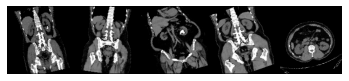

In [9]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:5], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

In [10]:
img, label = dataset[0]
print(img.shape,label)

torch.Size([3, 150, 150]) 0


In [11]:
from torchvision.models import resnet50

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#model = CNN().to(device)
resnet = resnet50(weights=None)
modules = list(resnet.children())[:-2]      # delete the last fc layer.
resnet.fc = nn.Linear(2048 , 2)

In [13]:
resnet = resnet.to(device)

In [14]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
summary(resnet, (3, 150, 150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 75, 75]           9,408
       BatchNorm2d-2           [-1, 64, 75, 75]             128
              ReLU-3           [-1, 64, 75, 75]               0
         MaxPool2d-4           [-1, 64, 38, 38]               0
            Conv2d-5           [-1, 64, 38, 38]           4,096
       BatchNorm2d-6           [-1, 64, 38, 38]             128
              ReLU-7           [-1, 64, 38, 38]               0
            Conv2d-8           [-1, 64, 38, 38]          36,864
       BatchNorm2d-9           [-1, 64, 38, 38]             128
             ReLU-10           [-1, 64, 38, 38]               0
           Conv2d-11          [-1, 256, 38, 38]          16,384
      BatchNorm2d-12          [-1, 256, 38, 38]             512
           Conv2d-13          [-1, 256, 38, 38]          16,384
      BatchNorm2d-14          [-1, 256,

In [16]:

#Defining the model hyper parameters
num_epochs = 45
learning_rate = 0.00001
weight_decay = 0.001
weights = torch.Tensor([0.4, 0.6])
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss(size_average=True)
criterion.to(device)
#criterion = torch.nn.BCELoss(weight=weights)
optimizer = torch.optim.Adagrad(resnet.parameters(), lr=learning_rate, weight_decay=weight_decay)

d:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [17]:
def trainmodel(model, num_epochs, train_loader, valid_loader, criterion, optimizer):
    train_correct = 0
    train_total = 0
    valid_correct = 0
    valid_total = 0
    train_loss_list = []
    valid_loss_list = []
    train_accuracy_list = []
    valid_accuracy_list = []
    for epoch in range(num_epochs):
        train_loss = 0
        #model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            y_true = labels.to(device)
  
            outputs = model(images)
            labels = F.one_hot(labels, num_classes=2)
            loss = criterion(F.sigmoid(outputs), labels.float())
  
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() 
            _, predicted = torch.max(outputs.data, 1)
            train_total += y_true.size(0)
            train_correct += (predicted == y_true).sum().item()

        #Accuracy
        train_loss_list.append(train_loss/len(train_loader))
        train_accuracy = 100 * train_correct / train_total
        train_accuracy_list.append(train_accuracy)

        valid_loss = 0.0
        for i, (images, labels) in enumerate(valid_loader):
            images = images.to(device)
            labels = labels.to(device)
            y_true = labels.to(device)
  
            outputs = model(images)
            labels = F.one_hot(labels, num_classes=2)
            loss = criterion(F.sigmoid(outputs), labels.float())
            valid_loss += loss.item() 
            _, predicted = torch.max(outputs.data, 1)
            valid_total += y_true.size(0)
            valid_correct += (predicted == y_true).sum().item()
        valid_loss_list.append(valid_loss/len(valid_loader))
        valid_accuracy = 100 * valid_correct / valid_total
        valid_accuracy_list.append(valid_accuracy)

        print("Epoch {}/{}, Train Loss: {:.3f}, Train Accuracy: {:.3f}, Validation Loss: {:.3f}, Validation Accuracy: {:.3f}".format(epoch+1,num_epochs, train_loss_list[-1], train_accuracy, valid_loss_list[-1], valid_accuracy))
    #plt.plot(range(1,num_epochs+1), train_loss_list)
    #plt.xlabel("Number of epochs")
    #plt.ylabel("Training loss")
    plt.plot(range(1,num_epochs+1), train_loss_list, 'bo', label='Training loss')
    plt.plot(range(1,num_epochs+1), valid_loss_list, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    plt.plot(range(1,num_epochs+1), train_accuracy_list, 'b', label='Training Accuracy')
    plt.plot(range(1,num_epochs+1), valid_accuracy_list, 'b', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.show()
    return 

In [18]:
import gc

gc.collect()

torch.cuda.empty_cache()

d:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/45, Train Loss: 0.574, Train Accuracy: 73.390, Validation Loss: 0.681, Validation Accuracy: 57.714
Epoch 2/45, Train Loss: 0.504, Train Accuracy: 73.966, Validation Loss: 0.606, Validation Accuracy: 63.337
Epoch 3/45, Train Loss: 0.473, Train Accuracy: 74.737, Validation Loss: 0.556, Validation Accuracy: 66.564
Epoch 4/45, Train Loss: 0.445, Train Accuracy: 75.742, Validation Loss: 0.541, Validation Accuracy: 68.009
Epoch 5/45, Train Loss: 0.425, Train Accuracy: 76.640, Validation Loss: 0.523, Validation Accuracy: 68.838
Epoch 6/45, Train Loss: 0.408, Train Accuracy: 77.433, Validation Loss: 0.517, Validation Accuracy: 69.473
Epoch 7/45, Train Loss: 0.395, Train Accuracy: 78.056, Validation Loss: 0.488, Validation Accuracy: 70.173
Epoch 8/45, Train Loss: 0.383, Train Accuracy: 78.666, Validation Loss: 0.468, Validation Accuracy: 70.913
Epoch 9/45, Train Loss: 0.375, Train Accuracy: 79.156, Validation Loss: 0.451, Validation Accuracy: 71.584
Epoch 10/45, Train Loss: 0.367, Train

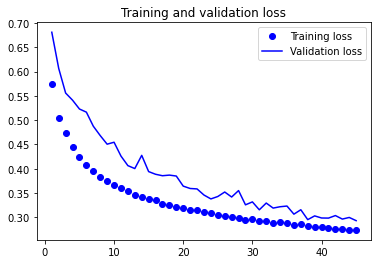

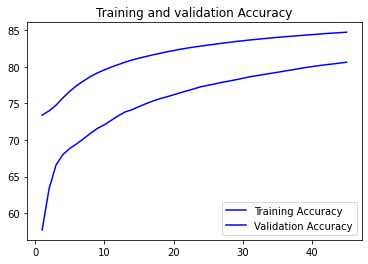

In [19]:
trainmodel(resnet, num_epochs, train_loader, valid_loader, criterion, optimizer)

In [30]:
def testmodel(model, loader):
    test_acc=0
    model.eval()
  
    with torch.no_grad():
        #Iterating over the training dataset in batches
        for i, (images, labels) in enumerate(loader):
          
            images = images.to(device)
            y_true = labels.to(device)
          
            #Calculating outputs for the batch being iterated
            outputs = model(images)
          
            #Calculated prediction labels from models
            _, y_pred = torch.max(outputs.data, 1)

            #Comparing predicted and true labels
            test_acc += (y_pred == y_true).sum().item()
      
        print(f"Test set accuracy = {100 * test_acc / len(valid_dataset)} %")

In [31]:
testmodel(resnet, valid_loader)

Test set accuracy = 85.98647818070067 %


In [32]:
torch.save(resnet.state_dict(), 'resnet50.pth')

In [33]:
fname = 'D:\\Git\\Research Paper\\Research_Project\\resnet50.pth'
loaded_dict = torch.load(fname)
resnet.load_state_dict(loaded_dict)

<All keys matched successfully>

In [29]:
def predict_img_class(img,model):
    """ Predict the class of image and Return Predicted Class"""
    img = to_device(img.unsqueeze(0), device)
    prediction =  model(img)
    _, preds = torch.max(prediction, dim = 1)
    return dataset.classes[preds[0].item()]

In [30]:
def to_device(data, device):
    "Move data to the device"
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Class : Stone


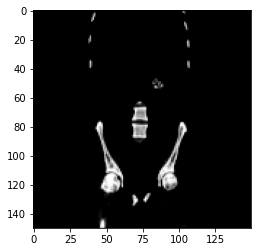

In [31]:
from PIL import Image

#open image file
img_path = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Test\Stone\Stone- (1100).jpg"
img = Image.open(img_path)

#convert image to tensor
img = normalize_transform(img)

#print image
plt.imshow(img.permute(1,2,0))

#prdict image label
print(f"Predicted Class : {predict_img_class(img,model)}")

Computer Vision

In [32]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

In [36]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [33]:
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)


edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)


cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None

In [37]:
for c in cnts:
    	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue
	# compute the rotated bounding box of the contour
	orig = image.copy()
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

In [38]:
	(tl, tr, br, bl) = box
	(tltrX, tltrY) = midpoint(tl, tr)
	(blbrX, blbrY) = midpoint(bl, br)
	# compute the midpoint between the top-left and top-right points,
	# followed by the midpoint between the top-righ and bottom-right
	(tlblX, tlblY) = midpoint(tl, bl)
	(trbrX, trbrY) = midpoint(tr, br)
	# draw the midpoints on the image
	cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
	# draw lines between the midpoints
	cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
		(255, 0, 255), 2)
	cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
		(255, 0, 255), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [39]:
	dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
	dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
	# if the pixels per metric has not been initialized, then
	# compute it as the ratio of pixels to supplied metric
	# (in this case, inches)
	if pixelsPerMetric is None:
		pixelsPerMetric = dB / 3

In [1]:
	dimA = dA / pixelsPerMetric
	dimB = dB / pixelsPerMetric
	# draw the object sizes on the image
	cv2.putText(orig, "{:.1f}in".format(dimA),
		(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
	cv2.putText(orig, "{:.1f}in".format(dimB),
		(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
	# show the output image
	cv2.imshow("Image", orig)
	cv2.waitKey(0)

NameError: name 'dA' is not defined